## Real Estate - Price Predictor

In [4]:
import pandas as pd

In [5]:
housing = pd.read_csv("data1.csv")

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.749324,5.75,9.30,0,0.74,6.308,35.54,4.5490,7,438,17.3,322.98,22.68,24.2
1,0.806114,4.75,9.30,0,0.74,6.308,36.28,5.0980,5,580,15.2,287.49,37.50,17.0
2,0.635745,4.75,4.19,1,0.62,6.308,31.10,4.8235,2,644,16.4,324.67,12.80,22.4
3,0.408587,0.75,8.57,0,0.86,7.180,23.33,5.0980,7,586,15.8,302.70,42.44,26.0
4,0.919693,7.00,7.11,0,0.86,7.180,29.25,5.0980,8,558,14.6,316.22,7.86,26.6


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6204 entries, 0 to 6203
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     6204 non-null   float64
 1   ZN       6204 non-null   float64
 2   INDUS    6204 non-null   float64
 3   CHAS     6204 non-null   int64  
 4   NOX      6204 non-null   float64
 5   RM       6199 non-null   float64
 6   AGE      6204 non-null   float64
 7   DIS      6204 non-null   float64
 8   RAD      6204 non-null   int64  
 9   TAX      6204 non-null   int64  
 10  PTRATIO  6204 non-null   float64
 11  B        6204 non-null   float64
 12  LSTAT    6204 non-null   float64
 13  MEDV     6204 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 678.6 KB


In [6]:
housing['CHAS'].value_counts()

0    3287
1    2917
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6199.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000
mean,0.773163,4.391642,6.454502,0.470181,0.725486,7.100650,33.410321,4.740017,5.403933,463.276435,17.116538,296.721331,25.321952,22.581528
std,2.606702,7.292910,3.137345,0.499150,0.111691,0.668973,14.021438,0.696775,3.734061,120.863812,1.740009,36.965988,11.760576,4.486668
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.295009,1.500000,4.190000,0.000000,0.620000,6.741500,26.290000,4.549000,3.000000,358.750000,15.500000,275.660000,15.270000,19.400000
50%,0.522166,3.750000,6.380000,0.000000,0.740000,7.180000,31.100000,4.823500,5.000000,459.000000,17.000000,294.250000,25.150000,22.400000
75%,0.749324,5.750000,7.840000,1.000000,0.860000,7.616000,35.540000,5.098000,7.000000,570.000000,18.500000,312.840000,35.030000,26.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,44.910000,50.000000


In [1]:
%matplotlib inline

In [3]:
# # For plotting histogram
import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [9]:
# For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 4963
Rows in test set: 1241



In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
strat_test_set['CHAS'].value_counts()

0    658
1    583
Name: CHAS, dtype: int64

In [18]:
strat_train_set['CHAS'].value_counts()

0    2629
1    2334
Name: CHAS, dtype: int64

In [16]:
# 95/7

In [17]:
# 376/28

In [19]:
housing = strat_train_set.copy()

## Looking for Correlations

In [20]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
ZN         0.186551
RM         0.115367
DIS        0.109514
B          0.103379
CHAS       0.029611
NOX       -0.066697
LSTAT     -0.091250
TAX       -0.094138
PTRATIO   -0.121421
AGE       -0.122700
RAD       -0.147875
INDUS     -0.187014
CRIM      -0.210283
Name: MEDV, dtype: float64

In [20]:
# from pandas.plotting import scatter_matrix
# attributes = ["MEDV", "RM", "ZN", "LSTAT"]
# scatter_matrix(housing[attributes], figsize = (12,8))

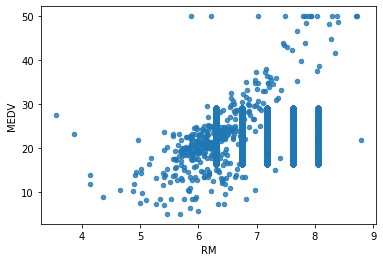

In [21]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations


In [23]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
6094,5.872050,0.00,18.10,0,0.693,6.405,96.00,1.6768,24,666,20.2,396.90,19.37,12.5,103.981265
5172,0.862903,5.00,5.65,1,0.740,6.744,32.58,4.8235,9,522,17.0,275.66,17.74,25.4,77.402135
467,0.749324,3.50,9.30,1,0.860,7.616,29.99,5.0980,5,417,18.8,319.60,25.15,18.2,54.753151
3458,0.124640,1.75,9.30,1,0.860,7.616,24.81,4.8235,4,439,17.9,299.32,7.86,17.6,57.641807
5163,0.351798,6.25,8.57,1,0.860,7.616,28.51,4.5490,2,337,17.3,262.14,25.15,16.4,44.248950


In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
ZN         0.186551
RM         0.115367
DIS        0.109514
B          0.103379
CHAS       0.029611
NOX       -0.066697
LSTAT     -0.091250
TAX       -0.094138
PTRATIO   -0.121421
AGE       -0.122700
TAXRM     -0.135845
RAD       -0.147875
INDUS     -0.187014
CRIM      -0.210283
Name: MEDV, dtype: float64

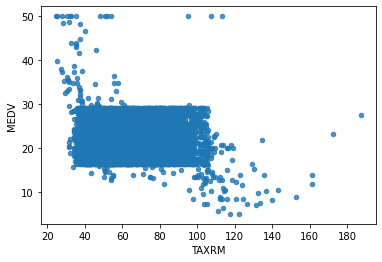

In [26]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [27]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [28]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape
# the original housing dataframe will remain unchanged

(4959, 13)

In [29]:
housing.drop("RM", axis=1).shape # Option 2
# there is no RM column and also the original housing dataframe will remain unchanged

(4963, 12)

In [30]:
median = housing["RM"].median() # Compute median for Option 3

In [31]:
housing["RM"].fillna(median) # Option 3
# the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
housing.shape

(4963, 13)

In [33]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [33]:
imputer.statistics_

array([  0.5221665,   3.75     ,   6.38     ,   0.       ,   0.74     ,
         7.18     ,  30.8      ,   4.8235   ,   5.       , 463.       ,
        17.       , 294.25     ,  25.15     ])

In [34]:
X = imputer.transform(housing)

In [35]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [38]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## Creating a Pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    
    ('std_scaler', StandardScaler()),
])


In [37]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [38]:
housing_num_tr.shape

(4963, 13)

## Selecting a desired model for Dragon Real Estates

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [129]:
some_data = housing.iloc[:5]

In [130]:
some_labels = housing_labels.iloc[:5]

In [131]:
prepared_data = my_pipeline.transform(some_data)

In [132]:
model.predict(prepared_data)

array([12.801, 24.854, 19.748, 19.442, 19.088])

In [133]:
list(some_labels)

[12.5, 25.4, 18.2, 17.6, 16.4]

## Evaluating the model

In [134]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [135]:
rmse

1.4402805692203666

## Cross Validation

In [136]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [138]:
rmse_scores

array([3.98987612, 3.82929473, 3.87852057, 3.7468401 , 3.85293691,
       3.8654056 , 3.7991153 , 3.72032026, 3.90664979, 3.78328642])

In [139]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [141]:
print_scores(rmse_scores)

Scores: [3.98987612 3.82929473 3.87852057 3.7468401  3.85293691 3.8654056
 3.7991153  3.72032026 3.90664979 3.78328642]
Mean:  3.837224580209439
Standard deviation:  0.07558389775985072


Quiz: Convert this notebook into a python file and run the pipeline using Visual Studio Code

## Saving the model

In [142]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [143]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [144]:
final_rmse

3.784623921931915

In [146]:
prepared_data[0]

array([ 1.91820872, -0.597897  ,  3.76333157, -0.94222611, -0.28892082,
       -1.0371168 ,  4.57280611, -4.50733062,  5.10181601,  1.6690479 ,
        1.7742433 ,  2.80817544, -0.50578985])

## Using the model

In [147]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([27.099])

In [148]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([27.099])

In [149]:
from joblib import dump, load  
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[0.43942006, 3.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([26.846])

In [150]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[0.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([26.852])

In [151]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[0.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -99.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([26.852])